# Narongkrit Khieopraphatsorn ID: 3975261346

# HW1_INF 552

# 1. Vertebral Column Data Set

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## (a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

download the dataset. Class 0 equals to NO and, Class 1 equals to AB.

In [2]:
df = pd.read_csv("vertebral_column_data/column_2C.dat",header=None,sep="\t")

In [3]:
df.columns = ['elvic incidence','pelvic tilt','lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','Label']

## (b) Pre-Processing and Exploratory data analysis:

## i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 (= NO) and 1 (= AB).

Class 0 is for Blue, Class 1 is for Green

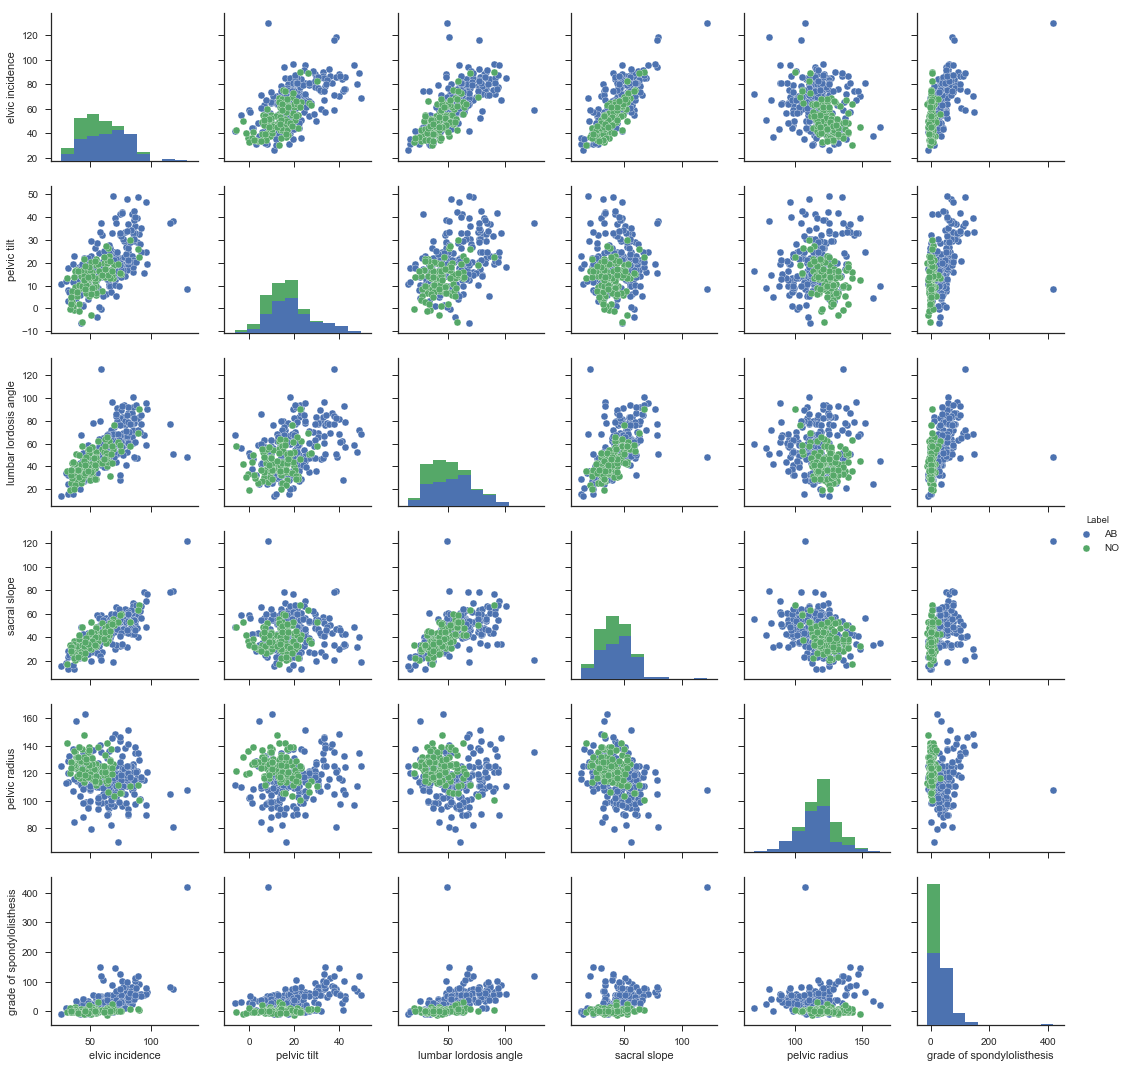

In [4]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, hue="Label")

In [5]:
df.Label.replace("AB",1, inplace=True)
df.Label.replace("NO",0, inplace=True)

## ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

Class 0 is for Blue, Class 1 is for Green

In [6]:
df.columns[:-1]

Index(['elvic incidence', 'pelvic tilt', 'lumbar lordosis angle',
       'sacral slope', 'pelvic radius', 'grade of spondylolisthesis'],
      dtype='object')

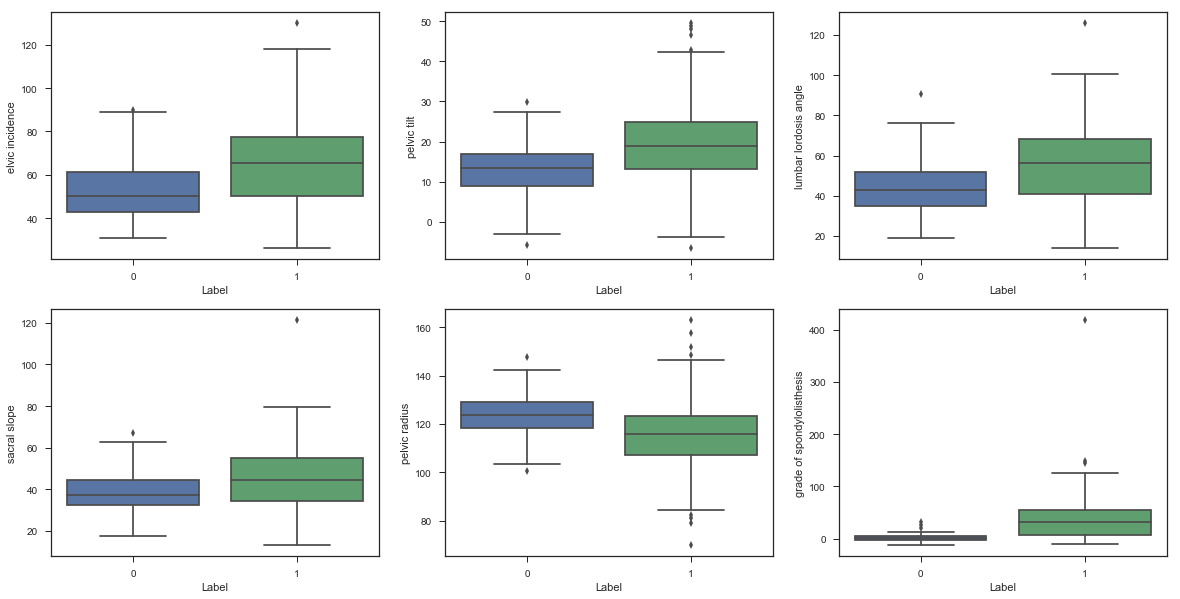

In [7]:
plt.figure(figsize=(20,10))

for i, var in enumerate(df.columns[:-1]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x="Label", y=var , data=df)

## iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.


Train Test Split

In [8]:
# first 70 rows of Class 0
train_class_00 = df[df['Label'] == 0].head(70)
# first 140 rows of Class 1
train_class_01 = df[df['Label'] == 1].head(140)

# train_class
train_class = train_class_00.append(train_class_01, ignore_index = True) 

#X_train, y_train
X_train = train_class.drop('Label',axis=1)
y_train = train_class['Label']


In [9]:
# the rest of class 00 and 01
testing_class_00 = df[df['Label'] == 0][70:]
testing_class_01 = df[df['Label'] == 1][140:]

# testing class
testing_class = testing_class_00.append(testing_class_01, ignore_index = True)

#X_test, y_test
X_test = testing_class.drop('Label',axis=1)
y_test = testing_class['Label']

## (c) Classification using KNN on Vertebral Column Data Set

## i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [10]:
from sklearn.neighbors import KNeighborsClassifier

## ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k∗

Train error rate

In [11]:
train_error_rate = []

for i in range(208,0,-3):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    train_error_rate.append(np.mean(pred_i != y_train))

Text(0,0.5,'Train Error Rate')

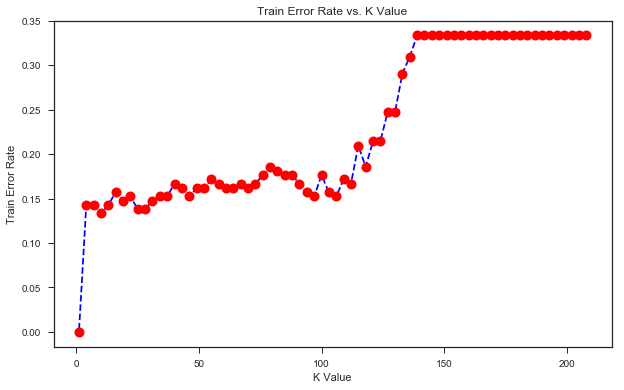

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(208,0,-3),train_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Train Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Train Error Rate')

In [13]:
min_y = min(train_error_rate)
min_x = range(208,0,-3)[train_error_rate.index(min_y)]
print(min_x, min_y)

1 0.0


Min of K is 1, and the error rate is 0 (For train error rate)

Test error rate

In [14]:
test_error_rate = []

# Will take some time
for i in range(208,0,-3):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    test_error_rate.append(np.mean(pred_i != y_test))

Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order).

Text(0,0.5,'Test Error Rate')

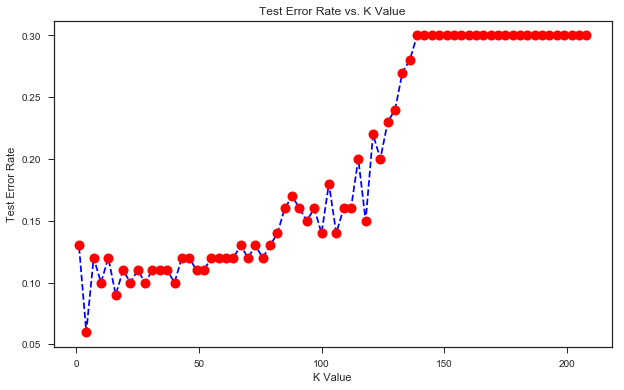

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(208,0,-3),test_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Test Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Test Error Rate')

Which k∗ is the most suitable k among those values?

In [16]:
min_y = min(test_error_rate)
min_x = range(208,0,-3)[test_error_rate.index(min_y)]
print(min_x, min_y)

4 0.06


Min of K is 4, and the error rate is 0.06 (For test error rate)

Assign K = 4 for K = K*

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score

In [18]:
knn = KNeighborsClassifier(n_neighbors=min_x)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

Calculate the confusion matrix

In [19]:
print(confusion_matrix(y_test,pred))

[[25  5]
 [ 1 69]]


True Positive = 69, True Negative = 25, False Positive = 5, False Negative = 1

In [20]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



In [21]:
CM = confusion_matrix(y_test,pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 

In [22]:
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("Precision: ", precision_score(y_test, pred))
print("F1_Score  :" ,f1_score(y_test, pred))

True Positive Rate : 0.9857142857142858
True Negative Rate : 0.8333333333333334
Precision:  0.9324324324324325
F1_Score  : 0.9583333333333333


True Positive Rate : 0.9857142857142858,
True Negative Rate : 0.8333333333333334,
Precision :  0.9324324324324325,
F1_Score  : 0.9583333333333333

## iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you creatd in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

In [23]:
best_error_rate = []

for N in range(10,211,10):

    # first 70 rows of Class 0
    train_class_00 = df[df['Label'] == 0].head(N//3)
    # first 140 rows of Class 1
    train_class_01 = df[df['Label'] == 1].head(N - N//3)

    # train_class
    train_class = train_class_00.append(train_class_01, ignore_index = True) 

    #X_train, y_train
    X_train = train_class.drop('Label',axis=1)
    y_train = train_class['Label']
    
    error_rate = []

    # Will take some time
    for i in range(1,197,5):
        
        if i <= N:
            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(X_train,y_train)
            pred_i = knn.predict(X_test)
            error_rate.append(np.mean(pred_i != y_test))
        else:
            break

    best_error_rate.append(min(error_rate))

Plot the best test error rate, which is obtained by some value of k, against the size of training set

Text(0,0.5,'Best Test Error Rate')

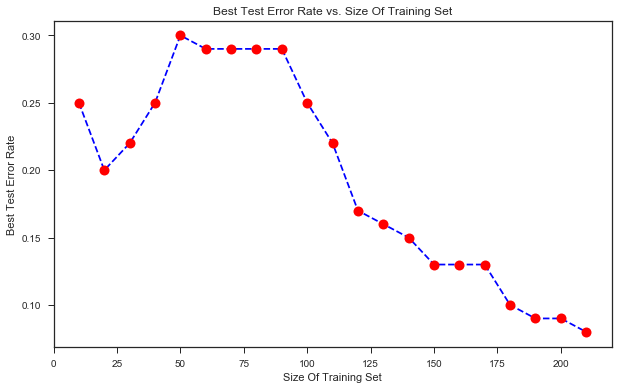

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(10,211,10),best_error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Best Test Error Rate vs. Size Of Training Set')
plt.xlabel('Size Of Training Set')
plt.ylabel('Best Test Error Rate')

## (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.

## i. Minkowski Distance:

In [25]:
# first 70 rows of Class 0
train_class_00 = df[df['Label'] == 0].head(70)
# first 140 rows of Class 1
train_class_01 = df[df['Label'] == 1].head(140)

# train_class
train_class = train_class_00.append(train_class_01, ignore_index = True) 

#X_train, y_train
X_train = train_class.drop('Label',axis=1)
y_train = train_class['Label']

# the rest of class 00 and 01
testing_class_00 = df[df['Label'] == 0][70:]
testing_class_01 = df[df['Label'] == 1][140:]

# testing class
testing_class = testing_class_00.append(testing_class_01, ignore_index = True)

#X_test, y_test
X_test = testing_class.drop('Label',axis=1)
y_test = testing_class['Label']

## A. which becomes Manhattan Distance with p = 1.

In [26]:
error_rate_table_minkowski = {}

manhattan_distance_error = []

for i in range(1,197,5):
        knn = KNeighborsClassifier(n_neighbors=i, p=1)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        manhattan_distance_error.append(np.mean(pred_i != y_test))

min_y = min(manhattan_distance_error)

min_k = range(1,197,5)[manhattan_distance_error.index(min_y)]

error_rate_table_minkowski['manhattan_distance_error'] = min_y

## B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [27]:
log_10_p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
p = 10 ** log_10_p

best_log_p = []

for var in p:
    knn = KNeighborsClassifier(n_neighbors=min_k, p=var)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    best_log_p.append(np.mean(pred_i != y_test))

min_y = min(best_log_p)
min_p = log_10_p[best_log_p.index(min_y)]

error_rate_table_minkowski['best_log_p'] =  "log p is "+str(min_p) +", best error rate is "+str(min_y)

## C. which becomes Chebyshev Distance with p → ∞

In [28]:
chebyshev_distance_error = []

for i in range(1,197,5):
        knn = KNeighborsClassifier(n_neighbors=i, p=float('inf'))
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        chebyshev_distance_error.append(np.mean(pred_i != y_test))

min_y = min(chebyshev_distance_error)

min_k = range(1,197,5)[chebyshev_distance_error.index(min_y)]

error_rate_table_minkowski['chebyshev_distance_error'] = min_y

## ii. Mahalanobis Distance.

In [29]:
mahalanobis_distance_error = []

from sklearn.neighbors import DistanceMetric, NearestNeighbors

for i in range(1,197,5):
        knn = KNeighborsClassifier(n_neighbors=i, algorithm="brute", metric = 'mahalanobis',metric_params={'V':np.cov(X_train)})
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        mahalanobis_distance_error.append(np.mean(pred_i != y_test))

min_y = min(mahalanobis_distance_error)

min_k = range(1,197,5)[mahalanobis_distance_error.index(min_y)]

error_rate_table_minkowski['mahalanobis_distance_error'] = min_y

Summarize the test errors (i.e., when k = k∗) in a table.

In [30]:
error_rate_table_minkowski = pd.DataFrame(error_rate_table_minkowski,index = ['best_test_errors'])
error_rate_table_minkowski

,manhattan_distance_error,best_log_p,chebyshev_distance_error,mahalanobis_distance_error
best_test_errors,0.11,"log p is 0.6, best error rate is 0.06",0.08,0.16


## (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [31]:
# first 70 rows of Class 0
train_class_00 = df[df['Label'] == 0].head(70)
# first 140 rows of Class 1
train_class_01 = df[df['Label'] == 1].head(140)

# train_class
train_class = train_class_00.append(train_class_01, ignore_index = True) 

#X_train, y_train
X_train = train_class.drop('Label',axis=1)
y_train = train_class['Label']

# the rest of class 00 and 01
testing_class_00 = df[df['Label'] == 0][70:]
testing_class_01 = df[df['Label'] == 1][140:]

# testing class
testing_class = testing_class_00.append(testing_class_01, ignore_index = True)

#X_test, y_test
X_test = testing_class.drop('Label',axis=1)
y_test = testing_class['Label']

In [32]:
best_error_rate_weight = {}

euclidean_distance_error_weight = []

for i in range(1,197,5):
        knn = KNeighborsClassifier(n_neighbors=i,weights="distance")
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        euclidean_distance_error_weight.append(np.mean(pred_i != y_test))

min_y = min(euclidean_distance_error_weight)

min_k = range(1,197,5)[euclidean_distance_error_weight.index(min_y)]

best_error_rate_weight['euclidean_distance_error_weight'] = min_y

In [33]:
manhattan_distance_error_weight = []

for i in range(1,197,5):
        knn = KNeighborsClassifier(n_neighbors=i,weights="distance",p=1)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        manhattan_distance_error_weight.append(np.mean(pred_i != y_test))

min_y = min(manhattan_distance_error_weight)

min_k = range(1,197,5)[manhattan_distance_error_weight.index(min_y)]

best_error_rate_weight['manhattan_distance_error_weight'] = min_y

In [34]:
chebyshev_distance_error_weight = []

for i in range(1,197,5):
        knn = KNeighborsClassifier(n_neighbors=i,weights="distance",p=float('inf'))
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        chebyshev_distance_error_weight.append(np.mean(pred_i != y_test))

min_y = min(chebyshev_distance_error_weight)

min_k = range(1,197,5)[chebyshev_distance_error_weight.index(min_y)]

best_error_rate_weight['chebyshev_distance_error_weight'] = min_y

Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [35]:
best_error_rate_weight = pd.DataFrame(best_error_rate_weight, index = ['best_test_errors'] )
best_error_rate_weight

,euclidean_distance_error_weight,manhattan_distance_error_weight,chebyshev_distance_error_weight
best_test_errors,0.1,0.1,0.11


## f.) What is the lowest training error rate you achieved in this homework?

## The lowest training error rate = 0.00 (from question c. ii)